In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars=pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG",])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


Assumptions in multilinear Regression
 1.Linearity:the relationship between the predictors(X) and the response (Y) is linear
 2.Independence:Observaations are indepent of each other.
 3.NormalmDistrubution of errors:the residuals of the model.

EDA

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

Observations about info(), missing values
 - there are no missing values
 - Threre are 81 obsevations
 - the data types of the columns are aslo revelant and valid


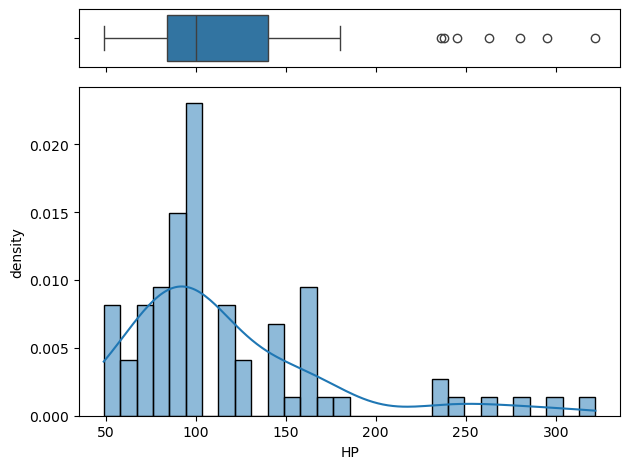

In [9]:
# Create a figure wwith two subplots
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
# Creating a bloxplot
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
#
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='density')

plt.tight_layout()
plt.show()


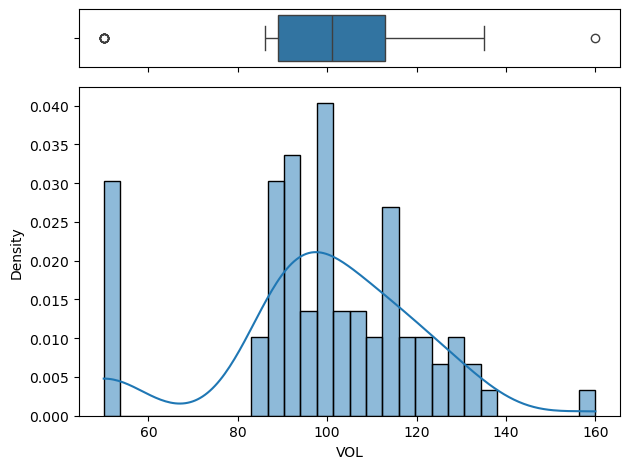

In [10]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})

# Creating a boxplot
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='') # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

# Adjust layout
plt.tight_layout()
plt.show()

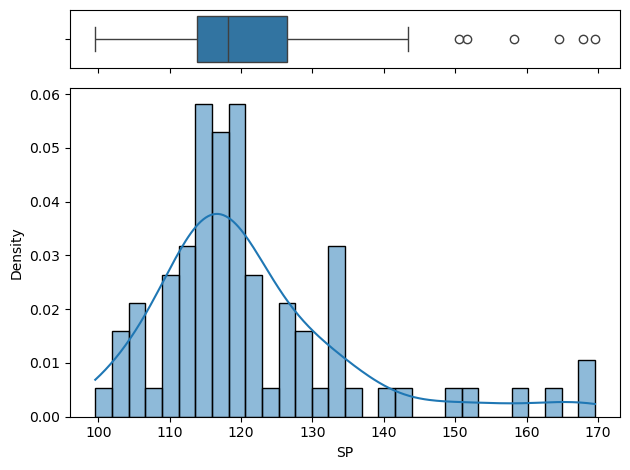

In [11]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})

# Creating a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='') # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

# Adjust layout
plt.tight_layout()
plt.show()

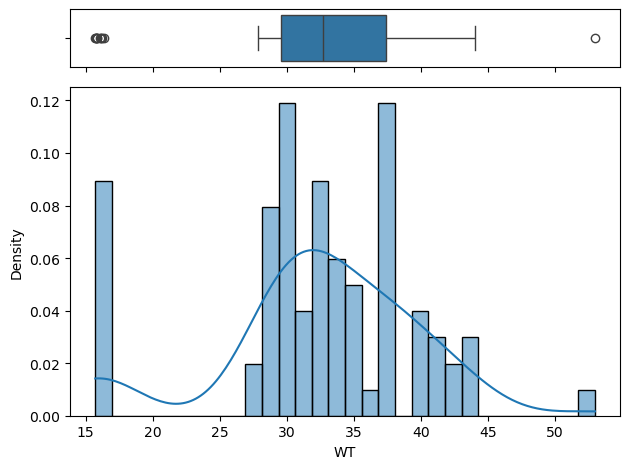

In [12]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})

# Creating a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='') # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

# Adjust layout
plt.tight_layout()
plt.show()

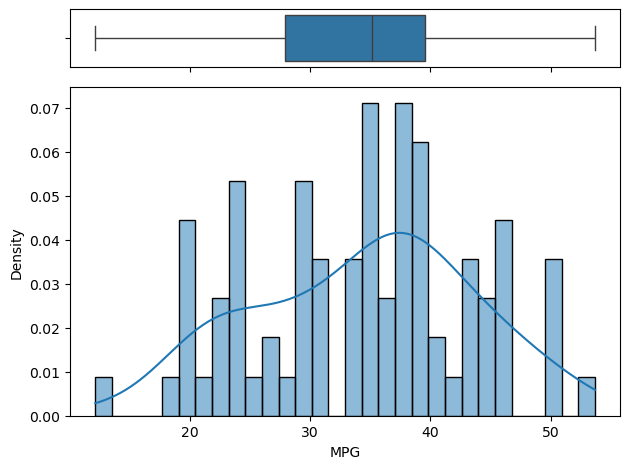

In [13]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})

# Creating a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='') # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

# Adjust layout
plt.tight_layout()
plt.show()

Observatons from boxplot and histograms
 - there are some  extreme values observed in towards the right tail os sp aand hp distribution
 - in VOL and WT columns,a few outlers are observed in both tails of the distruutions
  

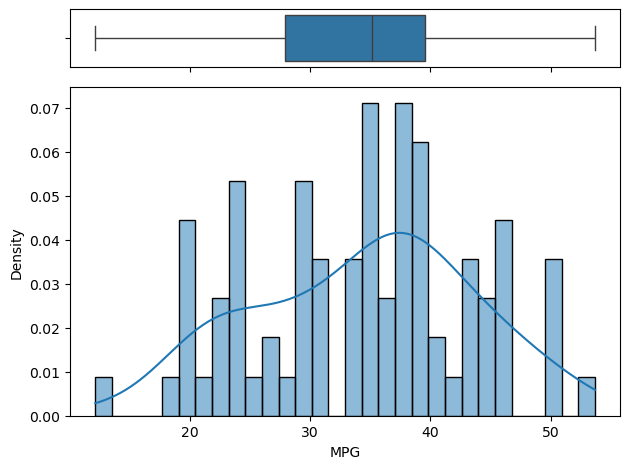

In [15]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})

# Creating a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='') # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

# Adjust layout
plt.tight_layout()
plt.show()

Checking for duplicated rows


In [17]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


Pair plots and Correlation Coefficients

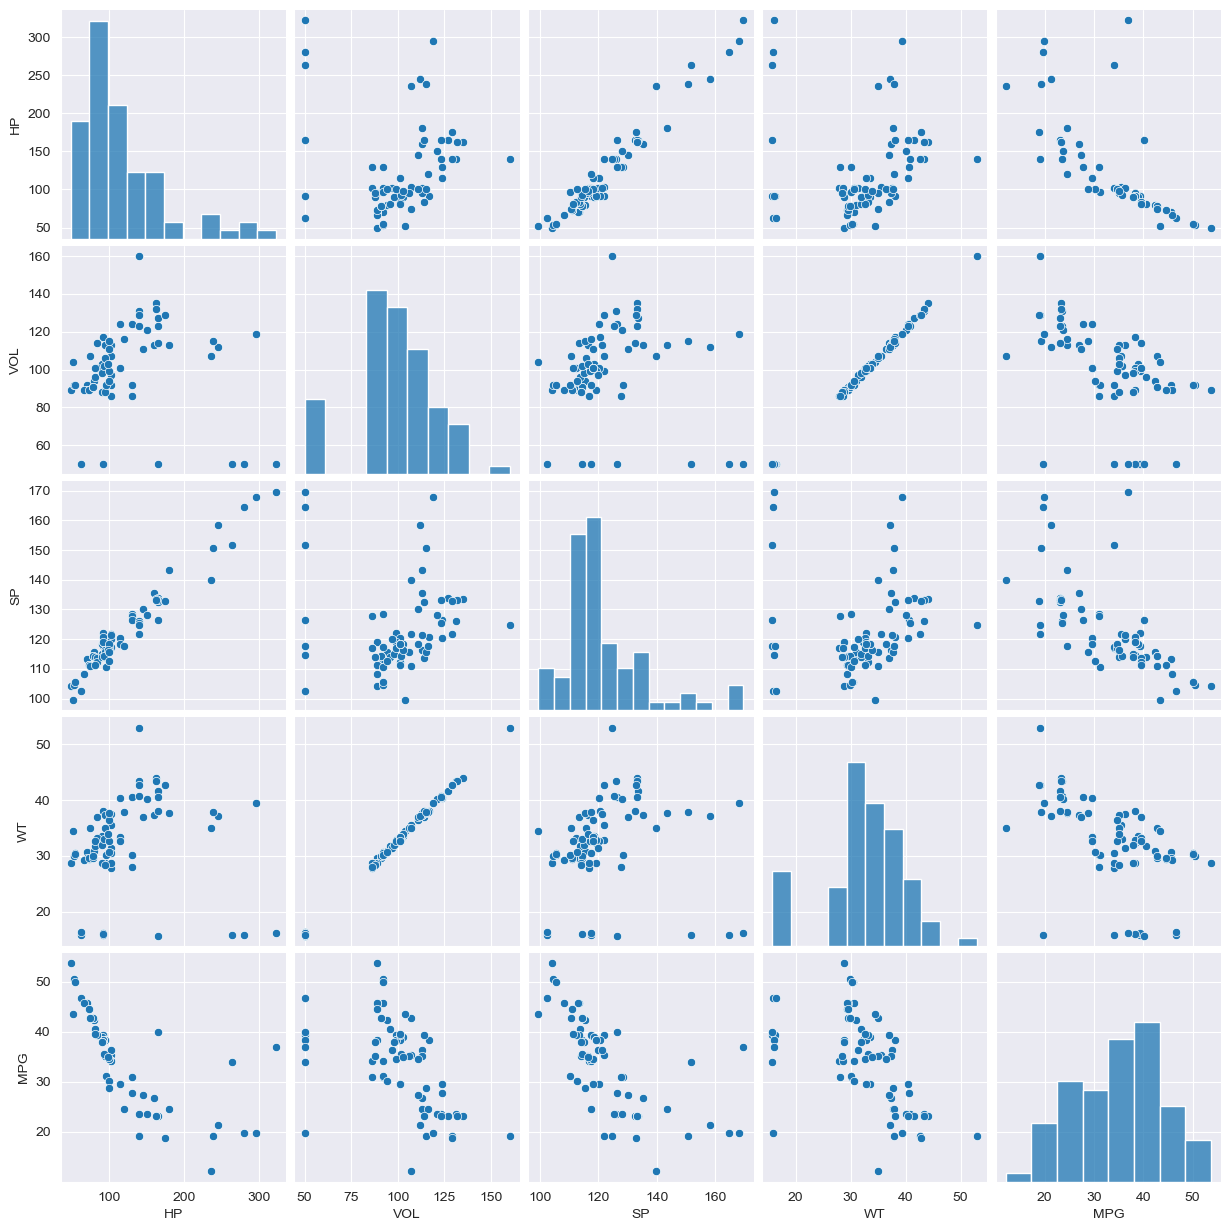

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [20]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


#Obsevations from correlation plots and coefficients
 - Between x and y all the x variables are showing moderate to high correlations strenths ,highest being between HP and MPG
 - Therefore this dataset qualfies for bilding a multiple linear regression Model to predict MPG
 - Among x columns (x1,x2,x3 and x4) ,some very high correlation strengths are observed between SP vs HP,VOLvsWT

Preparing  preliminary model conserding all X columns

In [23]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [24]:
 # Build model
# import statsmodels.formula.api as smf
model1 = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:27:24   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observatoins from Model Summary
 - The R-squared and adjusted R-Squared vallues are good and about 75% of variability in y is explaained by X columns
 - The probablity value with respect to f Stastic is close to zero , indicating thaat all or someof x coloumns are sigifanct
 - the P-values for VOL and wt are higher than 5% indicating some inrteraction some interaction issue aamong themselves, which need to be further explored 

#Performance metrics for model1

In [28]:
df1=pd.DataFrame()
df1["actual_y1"]=cars["MPG"]
df1.head()


,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [30]:
pred_y1=model1.predict(cars.iloc[:,0:4])
df1["pred_y1"]=pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [32]:
cars1=cars.drop("WT",axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [38]:
import statsmodels.formula.api as smf
model2=smf.ols('MPG~VOL+SP+HP',data=cars1).fit()

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:48:10   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Performance metrics for model2

In [46]:
df2=pd.DataFrame()
df2["actual_y2"]=cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [48]:
pred_y2=model2.predict(cars.iloc[:0:4])
df2["pred_y2"]=pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,NaN
1,50.013401,NaN
2,50.013401,NaN
3,45.696322,NaN
4,50.504232,NaN


In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2["actual_y2"], df2["pred_y2"])
print("MSE :",mse)
print("RMSE:",np.sqrt(mse))

ValueError: Input contains NaN.